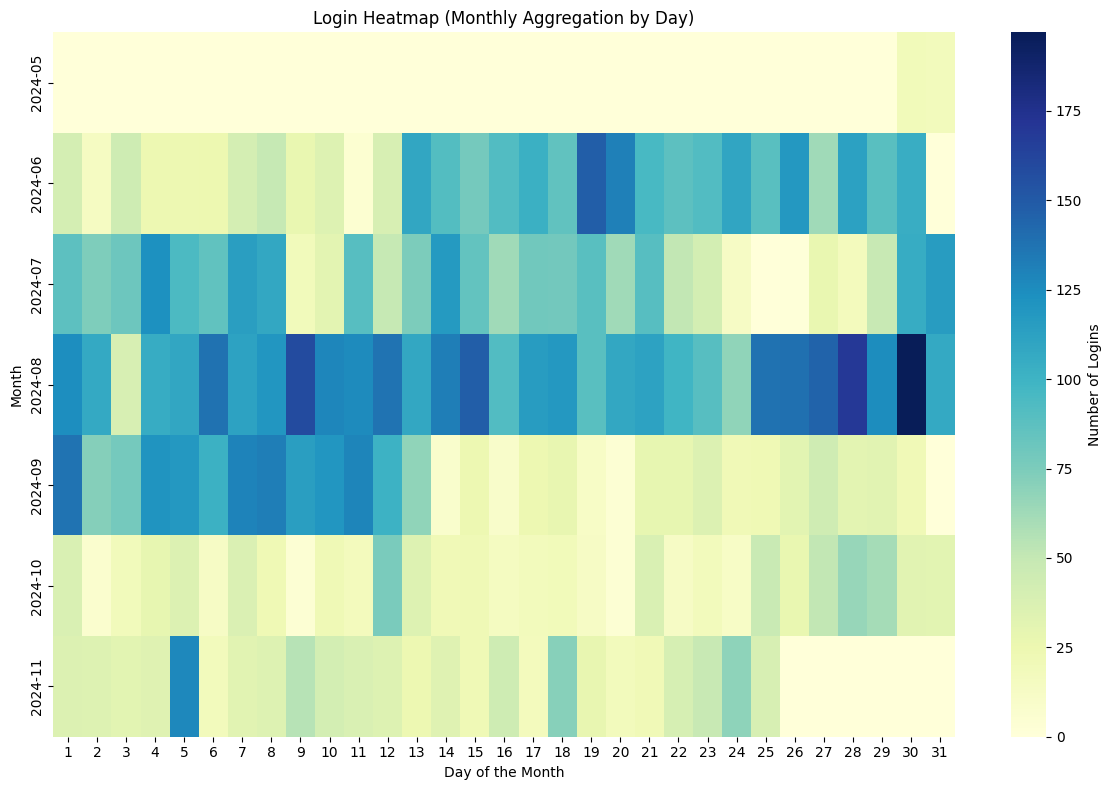

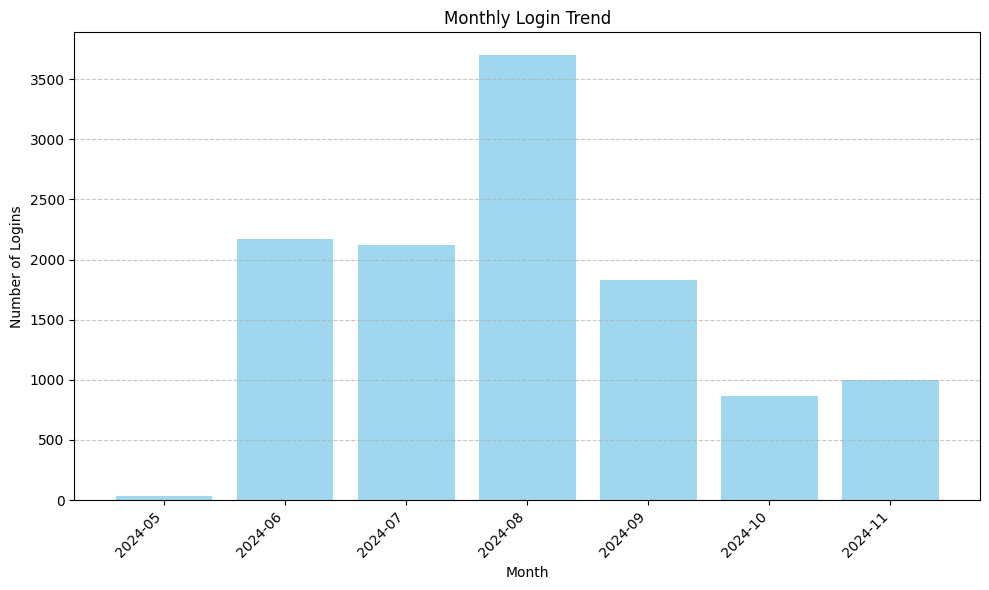

In [10]:
import json
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the file path
file_path = "other_data_parts/login_history.json"

# Load the login history data
with open(file_path, "r") as file:
    data = json.load(file)

# Extract dates from login history
login_dates = [
    datetime.strptime(entry["Date"], "%Y-%m-%d %H:%M:%S")
    for entry in data["LoginHistoryList"]
]

# Aggregate data for heatmap
heatmap_data = defaultdict(lambda: defaultdict(int))
for date in login_dates:
    month = date.strftime("%Y-%m")  # e.g., "2024-06"
    day = date.day
    heatmap_data[month][day] += 1

# Create matrix for heatmap
sorted_months = sorted(heatmap_data.keys())
days_in_month = range(1, 32)

heatmap_matrix = []
for month in sorted_months:
    row = [heatmap_data[month].get(day, 0) for day in days_in_month]
    heatmap_matrix.append(row)

# Aggregate data for monthly bar chart
monthly_logins = defaultdict(int)
for date in login_dates:
    month = date.strftime("%Y-%m")
    monthly_logins[month] += 1

sorted_months_bar = sorted(monthly_logins.keys())
monthly_login_counts = [monthly_logins[month] for month in sorted_months_bar]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    np.array(heatmap_matrix),
    annot=False,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=days_in_month,
    yticklabels=sorted_months,
    cbar_kws={"label": "Number of Logins"},
)

plt.xlabel("Day of the Month")
plt.ylabel("Month")
plt.title("Login Heatmap (Monthly Aggregation by Day)")
plt.tight_layout()
plt.savefig("login_heatmap.png")
plt.show()

# Create the monthly aggregation bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    sorted_months_bar,
    monthly_login_counts,
    color="skyblue",
    alpha=0.8,
    label="Monthly Logins",
)

plt.xlabel("Month")
plt.ylabel("Number of Logins")
plt.title("Monthly Login Trend")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("monthly_login_bar_chart.png")
plt.show()
